# Марковская цепь

Данильченко Вадим

-------------------------------------------------------------------------------------------------------------------------------

матрица переходных вероятностей на примере текста "Алисы в стране чудес"

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
with open('data/alice_en.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [3]:
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [4]:
POS

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [5]:
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [19]:
np.round(probabilities[:2], 4)

array([[1.100e-03, 2.830e-02, 2.680e-02, 5.250e-02, 2.000e-04, 1.110e-02,
        2.650e-02, 4.900e-03, 7.810e-02, 1.500e-03, 1.400e-02, 1.160e-01,
        2.510e-02, 1.838e-01, 6.000e-04, 1.880e-02, 3.000e-04, 8.940e-02,
        1.028e-01, 1.432e-01, 8.700e-03, 2.120e-02, 1.310e-02, 1.200e-03,
        3.030e-02, 5.000e-04],
       [4.870e-02, 3.780e-02, 0.000e+00, 6.000e-04, 3.723e-01, 0.000e+00,
        0.000e+00, 6.000e-04, 6.870e-02, 4.600e-03, 0.000e+00, 7.390e-02,
        6.000e-04, 1.100e-03, 1.323e-01, 1.700e-03, 0.000e+00, 3.550e-02,
        1.950e-02, 8.000e-03, 1.386e-01, 0.000e+00, 0.000e+00, 0.000e+00,
        5.560e-02, 0.000e+00]])

In [9]:
text[:500]

'projectgutenbergsalicesadventuresinwonderlandbylewiscarrollthisebookisfortheuseofanyoneanywhereatnocostandwithalmostnorestrictionswhatsoeveryoumaycopyitgiveitawayorreuseitunderthetermsoftheprojectgutenberglicenseincludedwiththisebookoronlineatwwwgutenbergorgtitlealicesadventuresinwonderlandauthorlewiscarrollpostingdatejuneebookreleasedatemarchlastupdateddecemberlanguageenglishcharactersetencodingasciistartofthisprojectgutenbergebookalicesadventuresinwonderlandalicesadventuresinwonderlandlewiscar'

In [10]:
for cp, cn in zip(text[:-1], text[1:]):
#     print(cp,cn)
    probabilities[POS[cp], POS[cn]] += 1

In [12]:
probabilities[:2]

array([[1.100e+01, 2.770e+02, 2.630e+02, 5.150e+02, 2.000e+00, 1.090e+02,
        2.600e+02, 4.800e+01, 7.660e+02, 1.500e+01, 1.370e+02, 1.137e+03,
        2.460e+02, 1.802e+03, 6.000e+00, 1.840e+02, 3.000e+00, 8.770e+02,
        1.008e+03, 1.404e+03, 8.500e+01, 2.080e+02, 1.280e+02, 1.200e+01,
        2.970e+02, 5.000e+00],
       [8.500e+01, 6.600e+01, 0.000e+00, 1.000e+00, 6.500e+02, 0.000e+00,
        0.000e+00, 1.000e+00, 1.200e+02, 8.000e+00, 0.000e+00, 1.290e+02,
        1.000e+00, 2.000e+00, 2.310e+02, 3.000e+00, 0.000e+00, 6.200e+01,
        3.400e+01, 1.400e+01, 2.420e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        9.700e+01, 0.000e+00]])

In [13]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [14]:
sum(probabilities[0])

0.9999999999999998

In [15]:
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

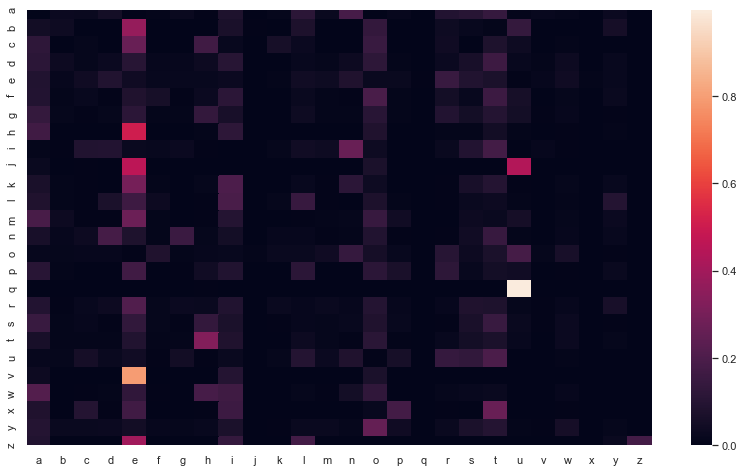

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

посчитаем вероятность наблюдать строку "hello" при вероятности начального состояния цепи для букв английского алфавита $\dfrac{1}{26}$.

In [20]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[:-1], string[1:]):
    proba *= probabilities[POS[cp], POS[cn]]
    print(cp, cn)
print(proba)

h e
e l
l l
l o
9.267238567090392e-06


подсчитаем вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"

In [21]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


сгенерируем выбороку из марковской цепи

In [22]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

jueadshylic


#### повторим для русского алфавита на книге "Война и Мир"

* Скачаем текст войны и мир. Очистим его, оставив только русские буквы и символы пробела. Построим матрицу переходных вероятностей. Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
* Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [92]:
# запишем в строковую переменную 4 тома произведения
text=''
for i in range(1,5):
    with open('data/Война и Мир/tom_'+str(i)+'.txt', 'r', encoding='utf-8') as f:
        temp_text = f.read().lower()
    text+=temp_text
    temp_text=''

# уберем все символы, не входящие в русский алфавит и не пробельные 
text = re.sub('[^а-я\s]','', text)
# уберем знак переноса строки и табуляции
text = re.sub('[\t\n]','', text)
# уберем лишние пробелы, оставим только по одному
text = text.split()
text = ' '.join(text)

text[:50]

'лев толстойвойна и миртом том часть перваячасть ор'

In [93]:
Russian = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(Russian)}
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31}

In [94]:
probabilities = np.zeros((len(Russian), len(Russian)))

In [95]:
for cp, cn in zip(text[:-1], text[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:
        probabilities[POS[cp], POS[cn]] += 1

In [96]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [97]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))

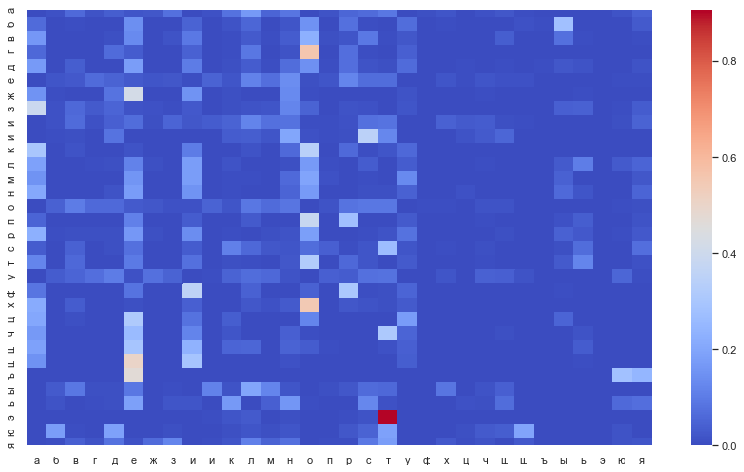

In [98]:
plt.figure(figsize=(14,8))
sns.heatmap(df, cmap='coolwarm')
plt.show()

Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [99]:
P_start = 1/len(probabilities[0])
probability = {}
for i in Russian:
    for j in Russian:
        prob = P_start * probabilities[POS['п'], POS[i]] * probabilities[POS[i], POS[j]] * probabilities[POS[j], POS['р']]
        if prob > 0:
            probability.setdefault(''.join(['п', i, j, 'р']), prob)

In [100]:
# Выведем TOP-10 строк по вероятности

dict_ = list(probability.items())
dict_.sort(key=lambda i: i[1], reverse=True)
dict_[:10]

[('прер', 0.00017372448232442147),
 ('прор', 0.00012950243922538768),
 ('прар', 0.00010749303898581705),
 ('потр', 6.360553099258459e-05),
 ('попр', 5.6748846813100625e-05),
 ('погр', 5.5211953807423746e-05),
 ('подр', 5.450155618521257e-05),
 ('поер', 4.6446798154806376e-05),
 ('побр', 4.087093294705964e-05),
 ('пьер', 2.6927134612879777e-05)]

Теперь сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [103]:
s = ['б']
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

буюдвахая
